In [6]:
# Idea: Make an outline of an image using fourier transformation. This can be done by filtering out online the black rgb value or an image and then outlining it. Furthermore, you can try resizing the image through multiplication. On top of that you can get the outline of every rgb and try resizing the whole image if possible.

# 14 minutes onwards https://www.youtube.com/watch?v=r6sGWTCMz2k&ab_channel=3Blue1Brown
# Try using svgs
# For integrating, you can use 0.01 to be the delta t (kind of like h in trap function)
# 101 constants should be close enough

# Fourier Series
Given P = period, a fourier series can be defined through Euler's formula as:
$$ f(t) = \sum^{\infty}_{n=-\infty}c_ne^{\frac{2i\pi nt}{P}} $$
Where the coefficients are complex and calculated through the following:
$$ c_n = \frac{1}{P} \int_{0}^{P}f(t)e^{\frac{-2i\pi nt}{P}}dt $$
When defined appropriately, this series can be used to approximate any function using the sum of an infinite number of sin and cosine functions.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from numba import jit
import cv2

In [8]:
def trap(f, a, b, h):
    n = (b-a)/h
    xs = np.linspace(a,b, int(n+1))
    return (2*sum(f(x) for x in xs) - f(a) -f(b)) * h * 0.5

In [1]:
h = 0.01 # How refined our integration should be 

def integrate_complex_function(f, a, b):
    def real_function(x):
        return np.real(f(x))
    def imaginary_function(x):
        return np.imag(f(x))
    # Trap function takes too long
    # real_integrated = trap(real_function, a, b, h)
    # imaginary_integrated = trap(imaginary_function, a, b, h)
    real_integrated = scipy.integrate.quad(real_function, a, b)[0]
    imaginary_integrated = scipy.integrate.quad(imaginary_function, a, b)[0]
    result = real_integrated + 1j*imaginary_integrated
    return result

def get_fourier_coefficients(f, n_coefficient, period):
    result = []
    for n in range(-n_coefficient, n_coefficient+1):
        def integrate_func(t):
            if f(t) == 0:
                return 0
            return f(t) * np.exp(-1j * 2 * np.pi * n * t / period)
        cn = (1./period) * integrate_complex_function(integrate_func, 0, period)
        result.append(cn)
    return np.array(result)

def produce_fourier_func(f, n_coefficient, period):
    coefficients = get_fourier_coefficients(f, n_coefficient, period)
    def fourier_func(t):
        total = 0. + 0.j
        sum_dimension_magnitude = int((len(coefficients) - 1) / 2)
        for n in range(-sum_dimension_magnitude, sum_dimension_magnitude+1):
            total +=  coefficients[n+sum_dimension_magnitude] * np.exp(1j * 2. * np.pi * n * t / period)
        return total
    return fourier_func

def f(x):
    return x**2+x**9+3

period = 10
fourier = produce_fourier_func(f, 50, period)
xs = np.linspace(0, period, 1000)
ys = [f(x) for x in xs]
ys1 = [fourier(x) for x in xs]
plt.plot(xs, ys)
plt.plot(xs, ys1)

NameError: name 'scipy' is not defined

### Now that we have a working Fourier function, let's try applying it to an image

(360, 560)


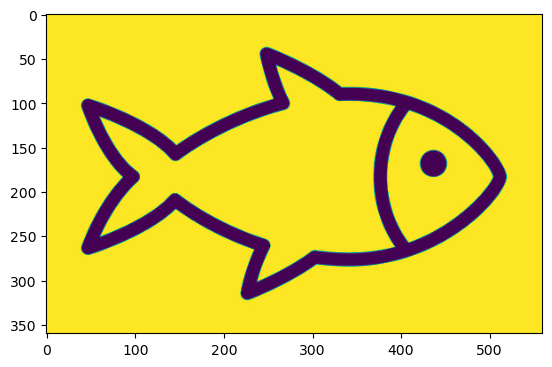

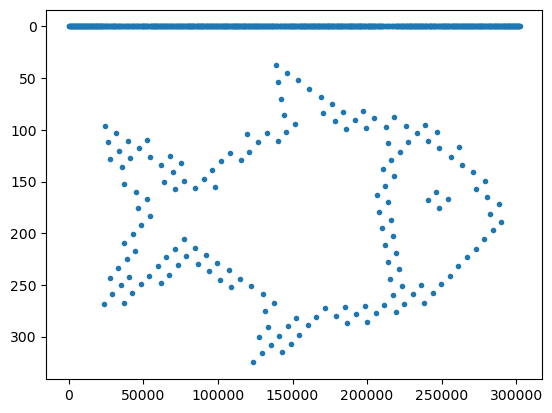

In [10]:
def generate_image_function(filename):
    image = plt.imread(filename)
    print(np.shape(image))
    n_rows, n_cols = np.shape(image)
    def image_function(x):
        # If there is a value of 1, return the y value as index, else return 0
        col = int(x/n_cols)
        row = int(x)%n_rows
        if image[row][col] != 1:
            return row
        else:
            return 0
    plt.imshow(image)
    xs = np.linspace(0, n_rows*n_cols*1.5, 1000)
    ys = [image_function(x) for x in xs]
    # plt.ylim(600)
    graph, plot = plt.subplots(1, 1)
    plot.plot(xs, ys, '.')
    plot.invert_yaxis()
    return image_function
image_function = generate_image_function("fish.png")

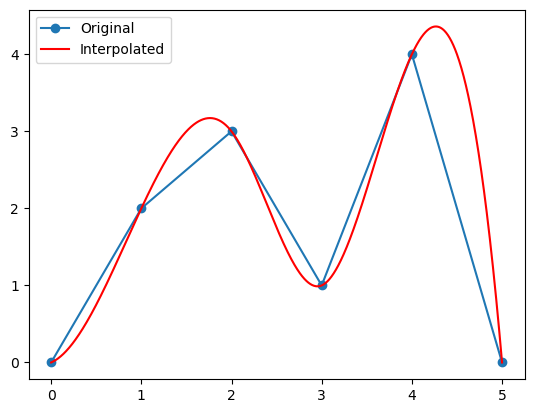

In [7]:
period = 360*560*1.5
fourier = produce_fourier_func(image_function, 45, period)
xs = np.linspace(0, period, 1000)
mesh_x, mesh_y = np.meshgrid(360*1.5, 560*1.5)

ys1 = [fourier(x) for x in xs]
graph, plot = plt.subplots(1, 1)
plot.plot(xs, ys1)

### This is when I found out my project is similar to other people's project so I switched to the other use of Fourier Transformation which is for image compression. The graph above was just for fun and I would not be doing what I did if I were to do it again. For starters, use opencv.

# Goal: Compress Images Through Fourier Transformation

# GOAL: TO DELETE BELOW AFTER IMPLEMENTING EVERYTHING MYSELF :)

In [12]:
# Import necessary libraries
import numpy as np
import cv2  # OpenCV for image processing

# Load the image
image = cv2.imread('mountain.jpeg', 0)  # Load image in grayscale

# Apply DFT to the image
dft = np.fft.fft2(image)
dft_shifted = np.fft.fftshift(dft)  # Shift the zero frequency components to the center

# Determine which frequency components to keep (compression ratio)
compression_ratio = 0.1  # Adjust as needed
M, N = image.shape
kept_rows = int(compression_ratio * M)
kept_cols = int(compression_ratio * N)

# Create a mask to zero-out high-frequency components
mask = np.zeros((M, N))
mask[M//2 - kept_rows//2:M//2 + kept_rows//2, N//2 - kept_cols//2:N//2 + kept_cols//2] = 1

# Apply the mask to the DFT to retain only the selected frequency components
compressed_dft = dft_shifted * mask

# Inverse DFT to get the compressed image
compressed_image = np.fft.ifft2(np.fft.ifftshift(compressed_dft)).real

# Save the compressed image
cv2.imwrite('compressed_image.jpg', compressed_image)

# Display the original and compressed images
# cv2.imshow('Original Image', image)
# cv2.imshow('Compressed Image', compressed_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


True

### In reality, we live in a digital world. This means our signals are digital too so in that case we can use discrete fourier transformation to speed things up. Which will be beneficial since I want to apply it to big images.

Discrete Fourier Transformation goes along these lines:
# TODO

Discrete Fourier Transformation is actually pretty symmetrical. So to speed things up even more, we can use Fast Fourier Transformation whic looks like the following:


In [13]:
'''
def produce_discrete_fourier_transform_functions(image, compression_ratio):
    M, N = np.shape(image)
    M = int(M * compression_ratio)
    N = int(N * compression_ratio)
    def discrete_fourier_transform_function(u , v):
        output = 0
        for x in range(M):
            for y in range(N):
                exponent = -1j*2*np.pi*(u*x/M + v*y/N)
                output += image[x, y]*np.exp(exponent)
        return output
    def inverse_discrete_fourier_transform_function(x, y):
        output = 0
        for u in range(M):
            for v in range(N):
                exponent = 1j*2*np.pi*(u*x/M + v*y/N)
                output += discrete_fourier_transform_function(u, v)*np.exp(exponent)
        return 1/M/N*output
    
    return discrete_fourier_transform_function, inverse_discrete_fourier_transform_function
'''

'\ndef produce_discrete_fourier_transform_functions(image, compression_ratio):\n    M, N = np.shape(image)\n    M = int(M * compression_ratio)\n    N = int(N * compression_ratio)\n    def discrete_fourier_transform_function(u , v):\n        output = 0\n        for x in range(M):\n            for y in range(N):\n                exponent = -1j*2*np.pi*(u*x/M + v*y/N)\n                output += image[x, y]*np.exp(exponent)\n        return output\n    def inverse_discrete_fourier_transform_function(x, y):\n        output = 0\n        for u in range(M):\n            for v in range(N):\n                exponent = 1j*2*np.pi*(u*x/M + v*y/N)\n                output += discrete_fourier_transform_function(u, v)*np.exp(exponent)\n        return 1/M/N*output\n    \n    return discrete_fourier_transform_function, inverse_discrete_fourier_transform_function\n'

In [14]:
'''
# https://www.mathworks.com/help/vision/ref/2dfft.html
# https://www.mathworks.com/help/matlab/ref/ifft2.html
def produce_fft_function(image, compression_ratio):
    M, N = np.shape(image)
    M = int(M * compression_ratio)
    N = int(N * compression_ratio)
    exponent_part_one = -1j*2*np.pi
    def fft(m , n):
        output = 0
        for x in range(M):
            for y in range(N):
                exponent = exponent_part_one*m*x/M
                exponent_2 = exponent_part_one*n*y/N
                output += image[x, y]*np.exp(exponent)*np.exp(exponent_2)
        return output
    return fft

def produce_ifft_function(fft_matrix):
    fft_matrix = fft_matrix
    m = len(fft_matrix)
    n = np.shape(fft_matrix[0])[0]
    wm = np.exp(2*np.pi*1j/(m))
    wn = np.exp(2*np.pi*1j/(n))
    def ifft(p, q):
        output = 0
        for j in range(1,m):
            mini_output = 0
            for k in range(1,n):
                mini_output += wm**((j-1)*(p-1))*wn**((k-1)*(q-1))*fft_matrix[j][k]
            output += mini_output*1/n
        return output/M
    return ifft
    
    '''

'\n# https://www.mathworks.com/help/vision/ref/2dfft.html\n# https://www.mathworks.com/help/matlab/ref/ifft2.html\ndef produce_fft_function(image, compression_ratio):\n    M, N = np.shape(image)\n    M = int(M * compression_ratio)\n    N = int(N * compression_ratio)\n    exponent_part_one = -1j*2*np.pi\n    def fft(m , n):\n        output = 0\n        for x in range(M):\n            for y in range(N):\n                exponent = exponent_part_one*m*x/M\n                exponent_2 = exponent_part_one*n*y/N\n                output += image[x, y]*np.exp(exponent)*np.exp(exponent_2)\n        return output\n    return fft\n\ndef produce_ifft_function(fft_matrix):\n    fft_matrix = fft_matrix\n    m = len(fft_matrix)\n    n = np.shape(fft_matrix[0])[0]\n    wm = np.exp(2*np.pi*1j/(m))\n    wn = np.exp(2*np.pi*1j/(n))\n    def ifft(p, q):\n        output = 0\n        for j in range(1,m):\n            mini_output = 0\n            for k in range(1,n):\n                mini_output += wm**((j-1)*

In [15]:
'''
image = cv2.imread('mountain.jpeg', 0)  # Load image in grayscale
n_rows, n_cols = np.shape(image)
print(n_rows, n_cols)
fft_func = produce_fft_function(np.array(image), 0.0009)
fourier_transformed_image = []
# iterate through each pixel [x, y] and calculate the value of the result of the dft
for row in range(n_rows):
    current_row = np.array([])
    print(f"Progress: {100*row/n_rows}%")
    for index in range(n_cols):
        current_row = np.append(current_row, fft_func(row, index))
    fourier_transformed_image.append(current_row)
    # print(fourier_transformed_image)
#         current_row.append(discrete_fourier_transform_function())
# dft_image = [discrete_fourier_transform_function(x, y) for x, y in zip(range(X), range(Y))]
# print(dft_image)
# cv2.imwrite('compressed_image.jpg', fourier_transformed_image)
'''

'\nimage = cv2.imread(\'mountain.jpeg\', 0)  # Load image in grayscale\nn_rows, n_cols = np.shape(image)\nprint(n_rows, n_cols)\nfft_func = produce_fft_function(np.array(image), 0.0009)\nfourier_transformed_image = []\n# iterate through each pixel [x, y] and calculate the value of the result of the dft\nfor row in range(n_rows):\n    current_row = np.array([])\n    print(f"Progress: {100*row/n_rows}%")\n    for index in range(n_cols):\n        current_row = np.append(current_row, fft_func(row, index))\n    fourier_transformed_image.append(current_row)\n    # print(fourier_transformed_image)\n#         current_row.append(discrete_fourier_transform_function())\n# dft_image = [discrete_fourier_transform_function(x, y) for x, y in zip(range(X), range(Y))]\n# print(dft_image)\n# cv2.imwrite(\'compressed_image.jpg\', fourier_transformed_image)\n'

In [16]:
'''
# print(fourier_transformed_image)
current_fourier = fourier_transformed_image.copy()
inverse_fft = produce_ifft_function(current_fourier)
compressed_image = []
for row in range(int(n_rows*0.0009)):
    current_row = []
    print(f"Progress: {100*row/n_rows}%")
    for index in range(int(n_cols*0.0009)):
        current_row.append(inverse_fft(row, index).real)
    compressed_image.append(current_row)
cv2.imwrite('compressed_image.jpg', np.array(compressed_image))
'''

'\n# print(fourier_transformed_image)\ncurrent_fourier = fourier_transformed_image.copy()\ninverse_fft = produce_ifft_function(current_fourier)\ncompressed_image = []\nfor row in range(int(n_rows*0.0009)):\n    current_row = []\n    print(f"Progress: {100*row/n_rows}%")\n    for index in range(int(n_cols*0.0009)):\n        current_row.append(inverse_fft(row, index).real)\n    compressed_image.append(current_row)\ncv2.imwrite(\'compressed_image.jpg\', np.array(compressed_image))\n'

In [17]:
# @jit#(nopython=True)
def produce_fft_function(image, compression_ratio):
    M: int = int(np.shape(image)[0] * compression_ratio)
    N: int = int(np.shape(image)[1] * compression_ratio)
    exponent_part_one = -1j*2*np.pi
    def fft(m , n):
        output = 0
        for x in range(M):
            output += np.sum([image[x, y]*np.exp(exponent_part_one*m*x/M)*np.exp(exponent_part_one*n*y/N) for y in range(N)])
        return output
    return fft

# @jit#(nopython=True)
def produce_ifft_function(fft_matrix):
    fft_matrix = fft_matrix
    m = len(fft_matrix)
    n = np.shape(fft_matrix[0])[0]
    wm = np.exp(2*np.pi*1j/(m))
    wn = np.exp(2*np.pi*1j/(n))
    def ifft(p, q):
        output = 0
        for j in range(1,m):
            mini_output = np.sum([wm**((j-1)*(p-1))*wn**((k-1)*(q-1))*fft_matrix[j][k] for k in range(1,n)])*1/n
            # for k in range(1,n):
            #     mini_output += wm**((j-1)*(p-1))*wn**((k-1)*(q-1))*fft_matrix[j][k]
            output += mini_output
        return output/M
    return ifft

# @jit#(nopython=True)
def do_all():
    image = cv2.imread('mountain.jpeg', 0)  # Load image in grayscale
    n_rows, n_cols = np.shape(image)
    print(n_rows, n_cols)
    fft_func = produce_fft_function(np.array(image), 0.0009)
    fourier_transformed_image = np.zeros((n_rows, n_cols))
    # iterate through each pixel [x, y] and calculate the value of the result of the dft
    for row in range(n_rows):
        print(f"Progress: {100*row/n_rows}%")
        for index in range(n_cols):
            fourier_transformed_image[row][index] = fft_func(row, index)
    current_fourier = fourier_transformed_image.copy()
    inverse_fft = produce_ifft_function(current_fourier)
    compressed_image = np.zeros((n_rows, n_cols))
    for row in range(int(n_rows*0.0009)):
        print(f"Progress: {100*row/n_rows}%")
        for index in range(int(n_cols*0.0009)):
            compressed_image[row][index] = inverse_fft(row, index).real
    cv2.imwrite('compressed_image.jpg', np.array(compressed_image))
    
do_all()

1414 2121
Progress: 0.0%
Progress: 0.07072135785007072%
Progress: 0.14144271570014144%
Progress: 0.21216407355021216%
Progress: 0.2828854314002829%
Progress: 0.3536067892503536%
Progress: 0.4243281471004243%
Progress: 0.49504950495049505%
Progress: 0.5657708628005658%
Progress: 0.6364922206506365%
Progress: 0.7072135785007072%


/var/folders/6x/c21gjhx125b69dpnbq4b24g00000gn/T/ipykernel_88897/1950552735.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  fourier_transformed_image[row][index] = fft_func(row, index)


Progress: 0.7779349363507779%
Progress: 0.8486562942008486%
Progress: 0.9193776520509194%
Progress: 0.9900990099009901%
Progress: 1.0608203677510608%
Progress: 1.1315417256011315%
Progress: 1.2022630834512023%
Progress: 1.272984441301273%
Progress: 1.3437057991513437%
Progress: 1.4144271570014144%
Progress: 1.4851485148514851%
Progress: 1.5558698727015559%
Progress: 1.6265912305516266%
Progress: 1.6973125884016973%
Progress: 1.768033946251768%
Progress: 1.8387553041018387%
Progress: 1.9094766619519095%
Progress: 1.9801980198019802%
Progress: 2.050919377652051%
Progress: 2.1216407355021216%
Progress: 2.1923620933521923%
Progress: 2.263083451202263%
Progress: 2.333804809052334%
Progress: 2.4045261669024045%
Progress: 2.4752475247524752%
Progress: 2.545968882602546%
Progress: 2.6166902404526167%
Progress: 2.6874115983026874%
Progress: 2.758132956152758%
Progress: 2.828854314002829%
Progress: 2.8995756718528995%
Progress: 2.9702970297029703%
Progress: 3.041018387553041%
Progress: 3.1117397

In [23]:
import numpy as np
import pygame
import sys

# Define the mathematical function you want to replicate as a Python function
def my_function(x):
    return np.sin(x) + np.sin(2 * x)

# Parameters for sound generation
sample_rate = 44100  # The number of samples per second (standard for audio)
duration = 3  # Duration of the sound in seconds
amplitude = 0.5  # Amplitude of the sound

# Create a time array
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Calculate the function's output for each time point
output = my_function(2 * np.pi * t)

# Normalize the output to be in the range [-1, 1]
output /= np.max(np.abs(output))

# Initialize the pygame mixer
pygame.mixer.init(frequency=sample_rate, size=-16, channels=1)
pygame.mixer.set_num_channels(1)

# Convert the numpy array to a sound sample
sound = pygame.sndarray.make_sound((output * 32767).astype(np.int16))

# Play the sound
sound.play()

# Wait for the sound to finish
pygame.time.delay(int(duration * 1000))

# Quit pygame
pygame.quit()

# Exit the program
sys.exit()


SystemExit: 